# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнила студентка гр. 3385 Тараканова Александра Денисовна. Вариант №8.

## Цель работы

 Овладеть навыками работы с математическими пакетами для исследова
ния подгрупп в социальных сетях, а также моделирования, отображения
 и анализа сетей аффилированности.

### Основные теоретические положения

#### Социоматрица
Социоматрица $A$ — квадратная матрица размера $g \times g$, где каждый элемент $a_{ij}$ показывает наличие ($1$) или отсутствие ($0$) связи между акторами.  
Для неориентированных сетей выполняется равенство $a_{ij} = a_{ji}$.

#### Список рёбер
Альтернативное представление графа:
$$
E = \{(i, j) \mid a_{ij} = 1\}.
$$

#### Плотность сети
$$
den(G) = \frac{2L}{g(g - 1)},
$$
где $L$ — число рёбер, $g$ — количество вершин.

#### Компоненты связности
Компонента связности — максимальный набор вершин, между которыми существует путь.

#### Диаметр сети
$$
diam(G) = \max_{i, j} d_{ij},
$$
где $d_{ij}$ — длина кратчайшего пути.

#### Коэффициент кластеризации
Локальный:
$$
Cl_i(G) = \frac{2N_i}{k_i(k_i - 1)}.
$$
Глобальный:
$$
Cl(G) = \frac{1}{n} \sum_{i=1}^{n} C_i.
$$

#### Двудольные сети
Граф $G = (V, E)$ является двудольным, если
$$
V = V_1 \cup V_2, \quad V_1 \cap V_2 = \emptyset, \quad
E \subseteq \{(u, v) \mid u \in V_1, v \in V_2\}.
$$

#### Гиперграф
Гиперграф определяется как
$$
H = H(A, B),
$$
где $A$ — множество вершин, $B$ — множество гиперрёбер (каждое может соединять более двух вершин).

#### Проекции двудольных сетей
Проекция на акторов:
$$
A_1 = BB^T - D_1.
$$
Проекция на события:
$$
A_2 = B^TB - D_2.
$$

#### k-ядра
$$
\deg(v) \ge k, \quad \forall v \in V.
$$

#### Отношение шансов
$$
OR = \frac{a d}{b c}, \quad LOR = \ln(OR).
$$


## Меры центральности

#### По степени
$$
C_D(i) = deg(i), \qquad
C_D'(i) = \frac{deg(i)}{g - 1}.
$$

#### По близости
$$
C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}, \qquad
C_C'(i) = \frac{g - 1}{\sum_{j \neq i} d_{ij}}.
$$

#### По посредничеству
$$
C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}, \qquad
C_B'(i) = \frac{2 C_B(i)}{(g-1)(g-2)}.
$$

#### По информации
Алгоритм:
1. $A = 1 + K$  
2. $C = A^{-1}$  
3. $T = Tr(C)$, $R = \sum c_{ij}$  

Центральность:
$$
C_I(i) = \frac{1}{c_{ii} + (T - 2R)/g}.
$$
Нормировка:
$$
C_I'(i) = \frac{C_I(i)}{\sum C_I(j)}.
$$


## Групповые характеристики сетей

#### Централизация по степени
$$
C_D =
\frac{
\sum_{i=1}^g \left( C_D(n^*) - C_D(n_i) \right)
}{
(g-1)(g-2)
}.
$$

#### Централизация по близости
$$
C_C =
\frac{
\sum_{i=1}^g \left( C'_C(n^*) - C'_C(n_i) \right)
}{
\frac{(g-2)(g-1)}{2g-3}
}.
$$

#### Централизация по посредничеству
$$
C_B =
\frac{
\sum_{i=1}^g \left( C'_B(n^*) - C'_B(n_i) \right)
}{
g-1
}.
$$


## Меры престижа для ориентированных сетей

#### Престиж по степени
$$
P_D(i) = \frac{deg_i(i)}{g - 1}.
$$

#### Престиж по близости
$$
P_P(i) =
\frac{|I_i|}{g - 1} \cdot
\frac{|I_i|}{\sum d_{ij}}.
$$

#### Престиж по рангу
$$
\left( \frac{1}{a} E - X \right)^T P_R = x,
$$
нормировка:
$$
P_R'(n_i) = \frac{P_R(n_i)}{m}.
$$


## Алгоритмы визуализации

### Фрюхтерман–Рейнгольд
$$
E = \sum_{i \neq j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij}).
$$

### Камада–Каваи
$$
E = \sum_{i \neq j} \frac{1}{2} k_{ij}(\|p_i - p_j\| - l_{ij})^2.
$$

## Постановка задачи

 С помощью математических пакетов и соответствующих библиотек про
вести анализ заданных социальных сетей на предмет подгрупп. Провести
 исследование сети аффилированности CEO. Полученные результаты со
держательно проинтерпретировать.

## Выполнение работы

установка необходимой библиотеки.

In [ ]:
# Библиотека для работы с графами
if (!require(igraph)) {
  install.packages("igraph", repos = "https://cloud.r-project.org/")
  library(igraph)
}

# Библиотека для работы с гиперграфами
if (!require(HyperG)) {
  install.packages("HyperG", repos = "https://cloud.r-project.org/")
  library(HyperG)
}

# Библиотека для работы с сетями (network objects)
if (!require(network)) {
  install.packages("network", repos = "https://cloud.r-project.org/")
  library(network)
}

# Библиотека для анализа сетей (cutpoints, gplot и др.)
if (!require(sna)) {
  install.packages("sna", repos = "https://cloud.r-project.org/")
  library(sna)
}

# подключаем пакет для преобразования igraph → network
if (!require(intergraph)) {
  install.packages("intergraph", repos = "https://cloud.r-project.org/")
  library(intergraph)
}


Извлечение социоматрицы и вывод ее на экран.

In [ ]:
csv_mat <- c(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0)

m <- matrix(csv_mat, nrow = 16, ncol = 16)


names <- c("Acciaiuoli", "Albizzi", "Barbadori", "Bischeri", "Castellani", "Ginori", "Guadagni", "Lamberteschi", "Medici", "Pazzi", "Peruzzi", "Pucci", "Ridolfi", "Salviati", "Strozzi", "Tornabuoni")

rownames(m) <- names
colnames(m) <- names

m


,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:

# Считывание данных
#dan <- read.csv("https://drive.google.com/file/d/1TK4ttQCYmCpQhQeqPMcDqCDpPwQzSCgX/view?usp=drive_link", skip = 1)

# Создание социоматрицы преобразованием данных в векторы, которые воспринимаются как числа, определяется количество столбцов и строк
sociomatrix <- matrix(as.numeric(unlist(m[])),
                     nrow = nrow(m),
                     ncol = ncol(m))
print(sociomatrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    1     0     0     0     0
 [2,]    0    0    0    0    0    1    1    0    1     0     0     0     0
 [3,]    0    0    0    0    1    0    0    0    1     0     0     0     0
 [4,]    0    0    0    0    0    0    1    0    0     0     1     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     1     0     0
 [6,]    0    1    0    0    0    0    0    0    0     0     0     0     0
 [7,]    0    1    0    1    0    0    0    1    0     0     0     0     0
 [8,]    0    0    0    0    0    0    1    0    0     0     0     0     0
 [9,]    1    1    1    0    0    0    0    0    0     0     0     0     1
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    1    1    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

Отобразить сеть с помощью алгоритма укладки.

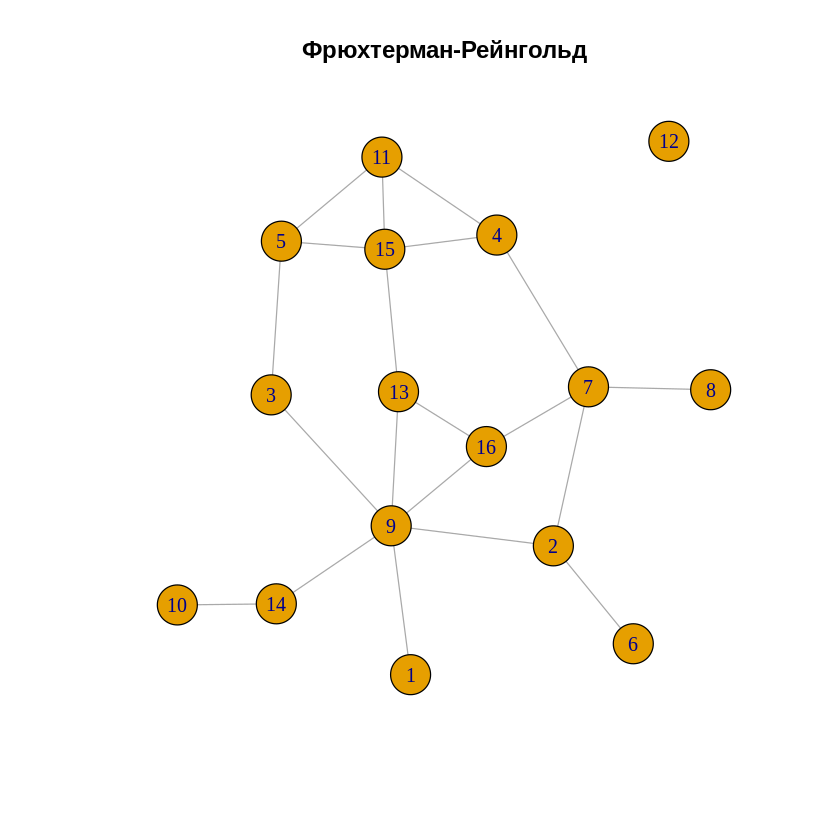

In [ ]:
# Строим граф из матрицы и отображаем его с layout Фрюхтермана–Рейнгольда
g <- graph_from_adjacency_matrix(sociomatrix, mode = "undirected")
plot(
  g,
  main = "Фрюхтерман-Рейнгольд",
  layout = layout_with_fr
)


# 2. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций. Построить графики сети, на котором выделены точки сочленения и мосты

Точки сочлинения:2,7,14,9
Мосты: 10-14, 14-9, 1-9, 2-6, 7-8

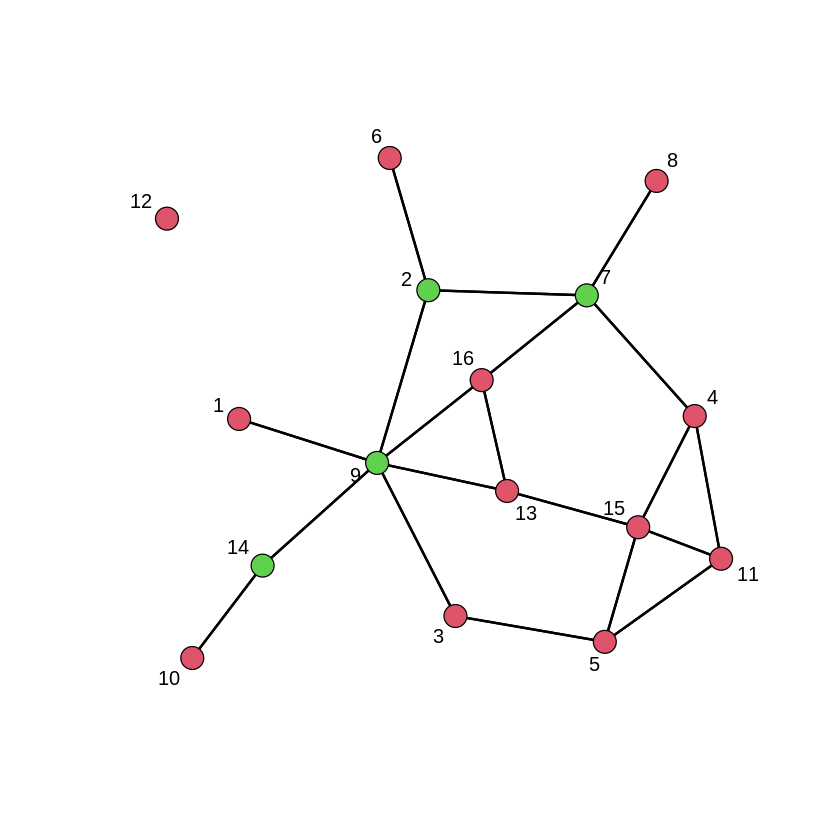

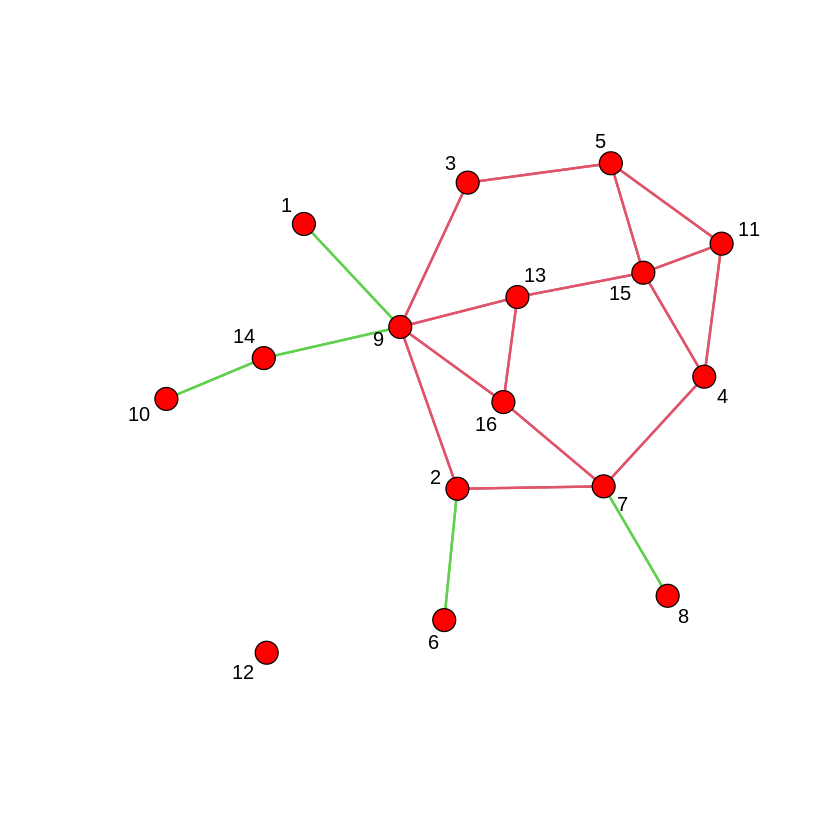

In [ ]:
# создаем сеть из матрицы смежности
net <- network(sociomatrix, matrix.type = "adjacency")

# точки сочленения
cpnet <- cutpoints(net, mode = "graph", return.indicator = TRUE)
gplot(net, gmode = "graph",
      vertex.col = cpnet + 2,   # выделяем точки сочленения
      jitter = FALSE,
      displaylabels = TRUE)

# мосты
bridges <- function(dat, mode = "graph", connected = c("strong", "weak")) { # создаем функцию
  e_cnt <- network.edgecount(dat)             # количество ребер
  if (mode == "graph") {                      # для неориентированного графа
    cmp_cnt <- components(dat)                # количество компонент связности
    b_vec <- rep(FALSE, e_cnt)                # вектор для хранения результата
    for (i in 1:e_cnt) {
      dat2 <- dat                             # копия сети
      delete.edges(dat2, i)                   # удаляем ребро
      b_vec[i] <- (components(dat2) != cmp_cnt) # проверяем изменение компонент
    }
  }
  return(b_vec)
}

brnet <- bridges(net)
gplot(net, gmode = "graph",
      vertex.col = "red",       # красим вершины
      edge.col = brnet + 2,     # выделяем мосты
      jitter = FALSE,
      displaylabels = TRUE)


# 3. Вычислить значение централизации для каждой меры. Сделать выводы.

In [ ]:
# преобразуем граф igraph в объект network
snet <- asNetwork(g)

# создаем подграф без изолированных вершин
non_isolated_vertices <- which(degree(snet) > 0)
snet_connected <- get.inducedSubgraph(snet, non_isolated_vertices)

# вычисляем меры центральности
n <- network.size(snet_connected)                     # размер сети
deg <- degree(snet_connected)                         # степень вершин
closeness_cent <- closeness(snet_connected, gmode = "graph")   # близость
between_cent <- betweenness(snet_connected, gmode = "graph")   # посредничество

# вычисляем централизацию по степени
cat("Централизация по степени:\n")
C_D <- sum(max(deg) - deg) / ((n - 1) * (n - 2))
cat("C_D =", C_D, "\n")

# вычисляем централизацию по близости
cat("Централизация по близости:\n")
C_C <- sum(max(closeness_cent) - closeness_cent) * (2*n - 3) / ((n - 1) * (n - 2))
cat("C_C =", C_C, "\n")

# вычисляем централизацию по посредничеству
cat("Централизация по посредничеству:\n")
C_B <- sum(max(between_cent) - between_cent) * 2 / ((n - 1) * (n - 1) * (n - 2))
cat("C_B =", C_B, "\n")


Централизация по степени:
C_D = 0.5494505 
Централизация по близости:
C_C = 0.3224523 
Централизация по посредничеству:
C_B = 0.4368132 


Централизация по степени находится примерно на уровне 0.55. Это говорит о том, что структура сети достаточно сбалансирована: нет единственной вершины, которая доминирует по числу связей, и при этом большинство вершин участвуют в связях без выраженной изоляции.

Невысокое значение централизации по близости указывает на отсутствие ярко выраженного узла, из которого можно было бы быстро достигнуть остальных. Иначе говоря, сеть не организована вокруг одного «центра», обеспечивающего минимальные расстояния до всех других вершин.

Показатель централизации по посредничеству также примерно на середине шкалы. Это означает, что роль прохождения путей распределена между многими вершинами: множество узлов участвуют как промежуточные в связях между другими, однако какого-то единственного ключевого посредника в структуре сети не выделяется.

# 4. Исследовать данную сеть на предмет подгрупп с помощью k-ядер.
 Указать какие подгруппы получились. Сделать выводы.

cores
 0  1  2 
 1  5 10 


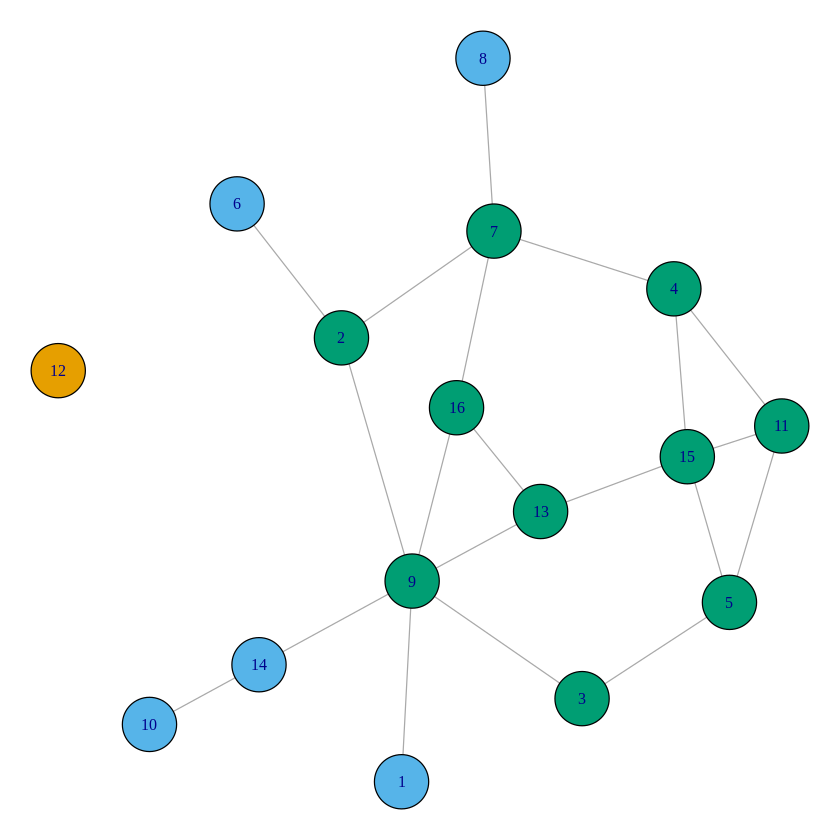

In [ ]:
cores <- coreness(g)
print(table(cores))

V(g)$color <- cores + 1

par(mar = rep(0, 4))
plot(g, vertex.label.cex = 0.8)


По результатам разложения сети на k-ядра видно, что вершина 12 попадает только в 0-ядро. Это ожидаемо, поскольку она полностью изолирована и не имеет каких-либо соединений с другими узлами.

Вершины-листья входят в 1-ядро, но не проходят в 2-ядро. Это подчёркивает их периферийный характер: они связаны с сетью минимально и не образуют более плотных взаимосвязанных групп.

Оставшиеся вершины формируют 2-ядро. Это свидетельствует о том, что в этой части сети связи распределены более равномерно и плотнее, чем на периферии, хотя уровень насыщенности связями всё ещё умеренный и не достигает высоких значений, характерных для более крупных или более плотных ядер.

 # 5. С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта:

 (1) Edge-betweenness, Leading eigenvector, Fast-greedy;

 (2) Spinglass, Walktrap, Label propagation;

 (3) InfoMAP, Louvain, Optimal.

 Кратко объяснить суть каждого алгоритма. Вывести значение мо
дулярности и отобразить полученные сообщества. Сделать выводы.

Выполнен второй вариант

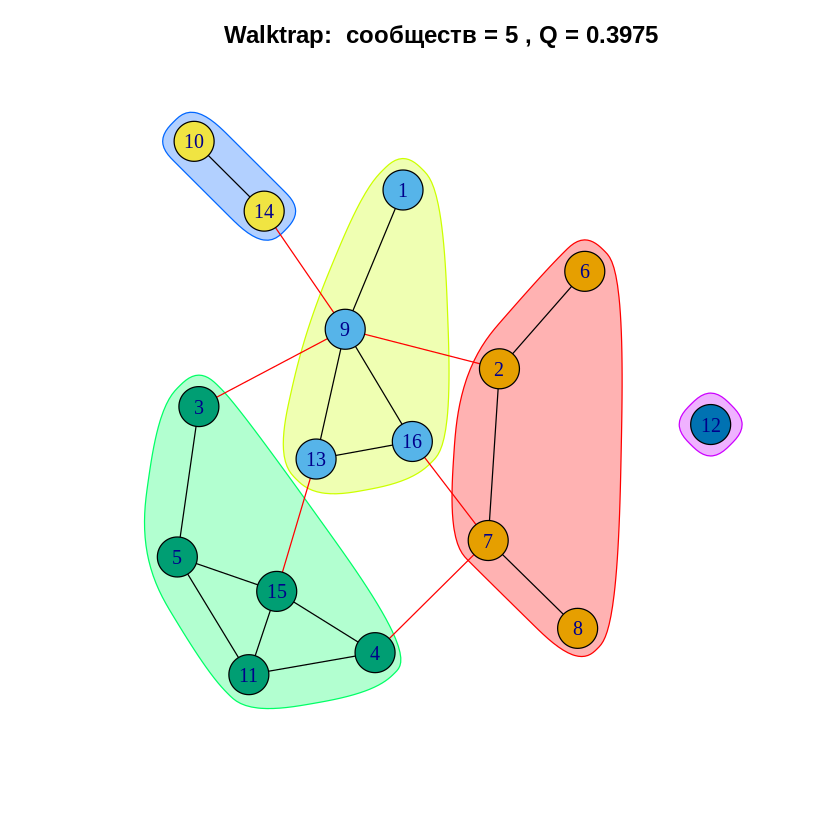

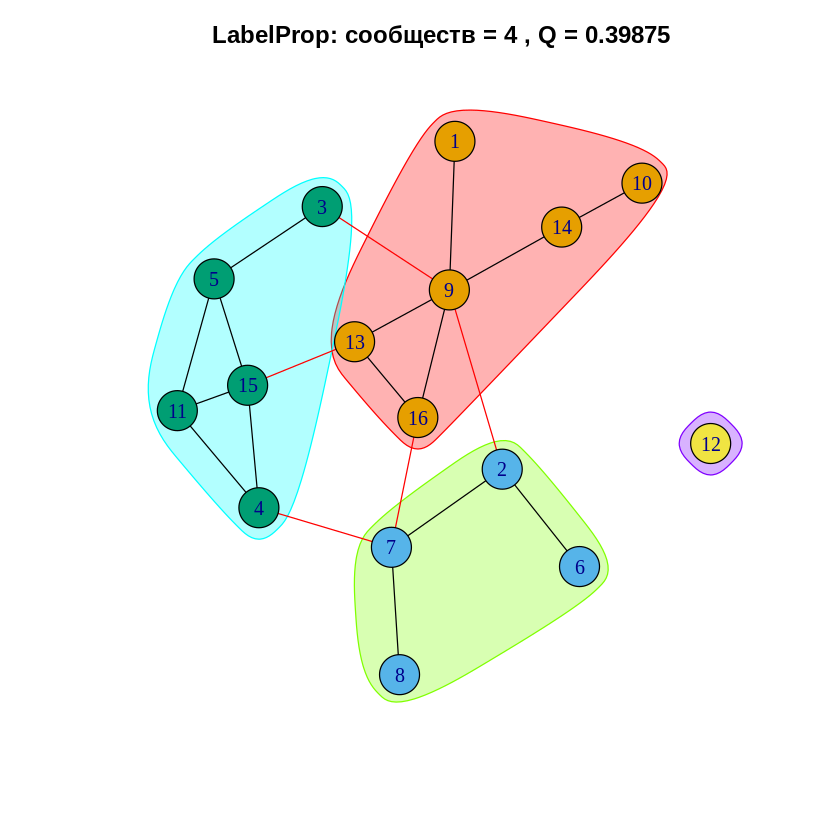

In [19]:

inet1 <- g   # исходный граф igraph

# алгоритм Spinglass работает только на связных графах - на несвязном даст ошибку
# spinglass <- cluster_spinglass(inet1)

walktrap  <- cluster_walktrap(inet1)
labelprop <- cluster_label_prop(inet1)

wt_str <- paste("Walktrap:  сообществ =", length(walktrap),  ", Q =", modularity(walktrap), "\n")
lp_str <- paste("LabelProp: сообществ =", length(labelprop), ", Q =", modularity(labelprop), "\n")

plot(walktrap,  inet1, main = wt_str)
plot(labelprop, inet1, main = lp_str)

Spinglass — метод, основанный на физической модели магнитных спинов. Ищет разбиение, минимизирующее энергию системы: вершины «предпочитают» быть в одном сообществе, если они хорошо связаны. Не оптимизирует модулярность напрямую, а использует энергетическую функцию. Может находить тонкие структуры и чувствителен к параметрам модели. Вычислительно тяжёлый, лучше работает на небольших и средних сетях.

Walktrap — алгоритм, основанный на коротких случайных блужданиях. Идея в том, что блуждание часто остаётся внутри плотного сообщества, прежде чем выйти наружу. Строит иерархическую кластеризацию: объединяет вершины в группы, минимизируя расстояние между ними, вычисленное по результатам блужданий. Даёт древовидную структуру сообществ. Работает умеренно быстро и стабильно, обычно даёт качественное разбиение.

Label Propagation — сверхбыстрый алгоритм, работающий на принципе распространения меток. Каждая вершина принимает наиболее частую метку среди соседей — так формируются локальные кластерные зоны. Не использует функцию качества, работает полностью итеративно и без параметров. Масштабируемый и лёгкий, но нестабильный: разные запуски могут давать разные результаты из-за случайного порядка обновления вершин.

# 6 Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу

In [ ]:
data <- c(0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)

# Создание матрицы 15x26
sociomatrix2 <- matrix(data, nrow = 26, ncol = 15, byrow = TRUE)

print(sociomatrix2)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    1    1    0    0    0    0    1     0     0     0     0
 [2,]    0    0    1    0    1    0    1    0    0     0     0     0     0
 [3,]    0    0    1    0    0    0    0    0    0     0     0     1     0
 [4,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     0     0     1
 [6,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    1    1    0    0    0    0    0     1     1     0     0
 [8,]    0    0    0    1    0    0    1    0    0     1     0     0     0
 [9,]    1    0    0    1    0    0    0    1    0     1     0     0     0
[10,]    0    0    1    0    0    0    0    0    1     0     0     0     0
[11,]    0    1    1    0    0    0    0    0    1     0     0     0     0
[12,]    0    0    0    1    0    0    1    0    0     0     0     0     0
[13,]    0    0    1    1

# 7. Отобразить сеть в виде биграфа.

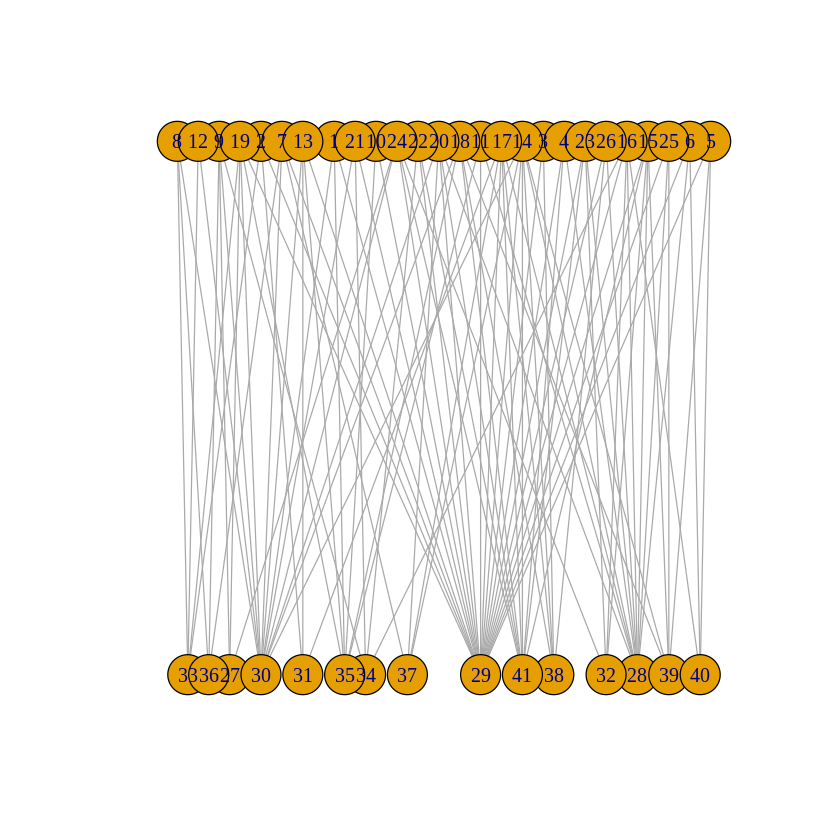

In [ ]:
inet2 <- graph_from_biadjacency_matrix(sociomatrix2)

plot(inet2, layout=layout.bipartite)

# 8. Отобразить сеть в виде гиперграфа и двойственного гиперграфа

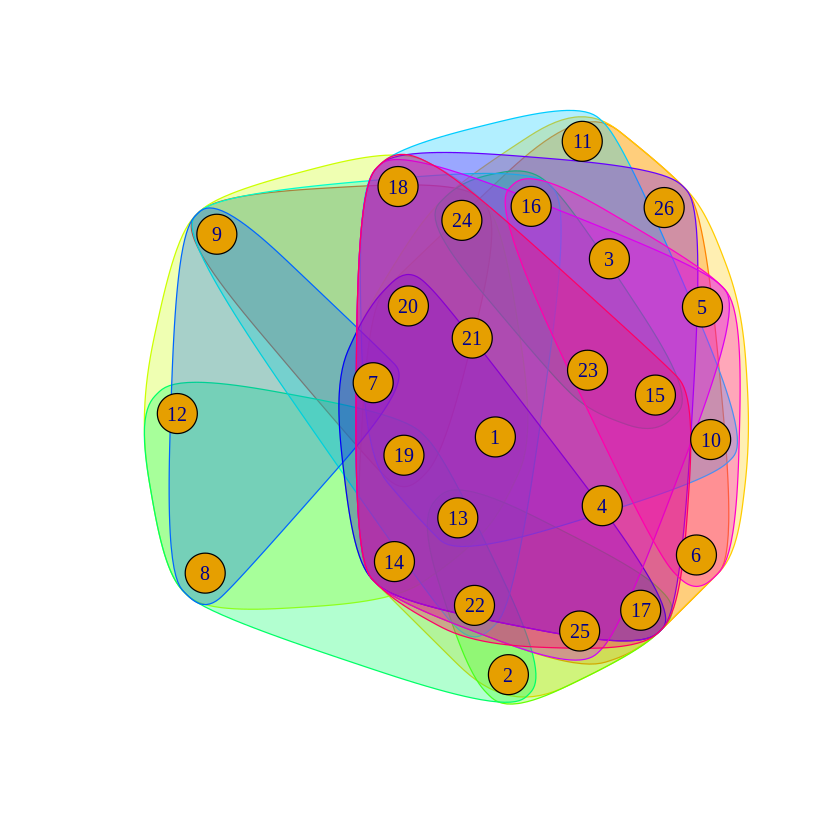

In [ ]:
types <- V(inet2)$type

ceo_ids  <- which(!types)
club_ids <- which(types)

adj_list <- as_adj_list(inet2)

hyperedges <- list()
for (i in seq_along(club_ids)) {
  club <- club_ids[i]
  neighbors <- adj_list[[club]]

  ceo_neighbors <- neighbors[neighbors %in% ceo_ids]

  if (length(ceo_neighbors) > 0) {
    hyperedges[[as.character(club)]] <- as.character(ceo_neighbors)
  }
}


hnet2 <- as.hypergraph(hyperedges)


plot(hnet2)

# 9. Представить сеть аффилированности в виде двух одномодальных сетей: сеть совместного участия акторов и сеть перекрытия событий. Представить полученные сети в виде матриц и взвешенных графов. Сделать выводы.

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    1    1    1    1    1    2    1    1     2     2     1     3
 [2,]    1    0    1    1    1    1    1    1    0     1     1     1     2
 [3,]    1    1    0    1    1    1    1    0    0     1     1     0     1
 [4,]    1    1    1    0    1    2    1    0    0     1     2     0     1
 [5,]    1    1    1    1    0    2    1    0    0     1     1     0     1
 [6,]    1    1    1    2    2    0    1    0    0     1     2     0     1
 [7,]    2    1    1    1    1    1    0    2    2     1     1     1     2
 [8,]    1    1    0    0    0    0    2    0    2     0     0     2     1
 [9,]    1    0    0    0    0    0    2    2    0     0     0     1     1
[10,]    2    1    1    1    1    1    1    0    0     0     2     0     2
[11,]    2    1    1    2    1    2    1    0    0     2     0     0     2
[12,]    1    1    0    0    0    0    1    2    1     0     0     0     1
[13,]    3    2    1    1

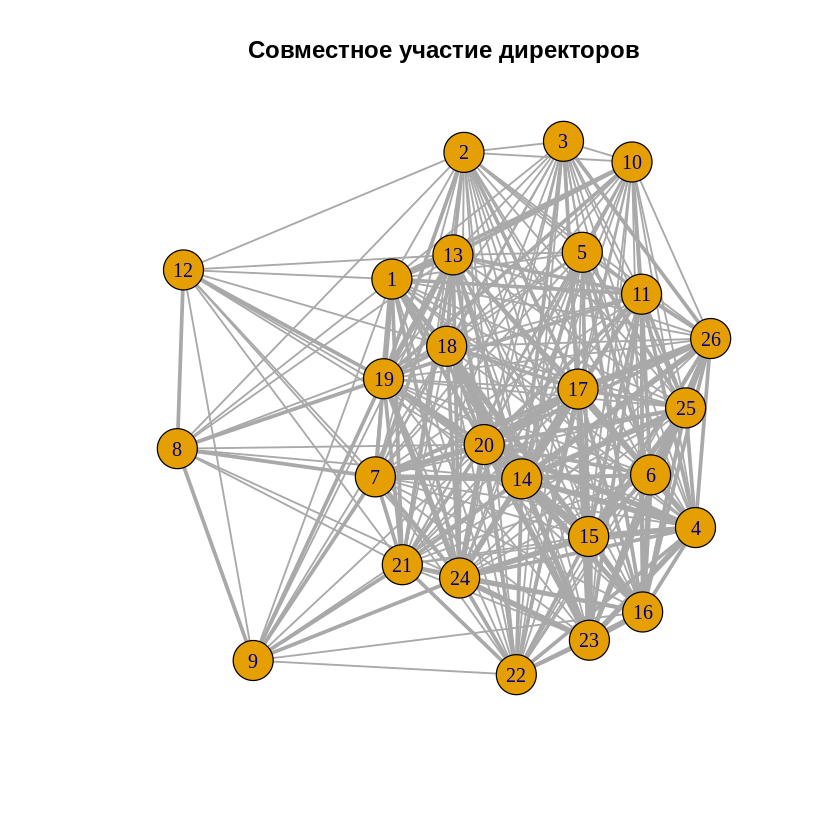

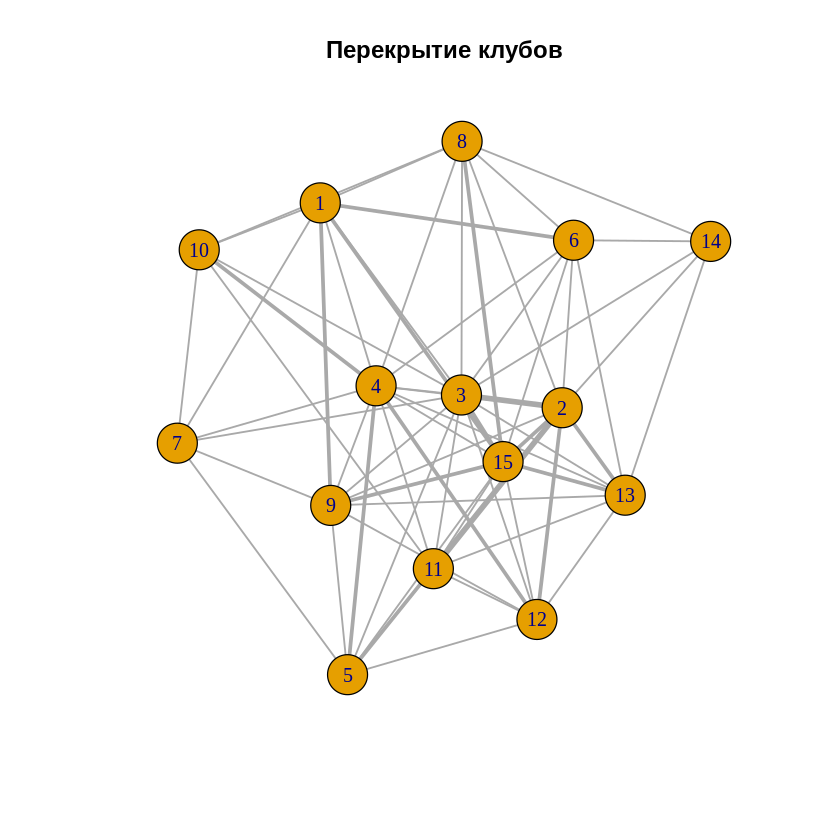

In [ ]:
pr <- bipartite_projection(inet2, multiplicity = TRUE)

ceo_net   <- pr$proj1
club_net  <- pr$proj2

ceo <- as_adjacency_matrix(ceo_net, sparse = FALSE, attr = "weight")

club <- as_adjacency_matrix(club_net, sparse = FALSE, attr = "weight")

print(ceo)
print(club)

plot(ceo_net,edge.width = E(ceo_net)$weight * 1.5, main = "Совместное участие директоров")

plot(club_net,edge.width = E(ceo_net)$weight * 1.5,main = "Перекрытие клубов")


# 10. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

In [ ]:
participation <- rowSums(sociomatrix2)
mean_participation <- mean(participation)

cat("Степени участия акторов:")
participation
cat("Среднее количество событий на актор")
round(mean_participation, 6)

Степени участия акторов:

[1] 3 3 2 3 3 3 4 3 4 2 3 2 4 7 5 5 6 5 5 5 3 3 4 5 3 3

Среднее количество событий на актор

[1] 3.769231

# 11. Вычислить размер и средний размер для каждого события. Сделать выводы.

In [ ]:
participation <- colSums(sociomatrix2)
mean_participation <- mean(participation)

cat("Размеры событий:")
participation
cat("Среднее количество размера событий:")
round(mean_participation, 4)

Размеры событий:

[1]  3 11 22 12  3  4  4  4  6  3  4  5  5  3  9

Среднее количество размера событий:

[1] 6.5333

# 12. Вычислить плотность для отношения совместного участия акторов и отношения перекрытия. Проинтерпретируйте полученные значения.

In [ ]:
density_ceo  <- edge_density(ceo_net)
density_club <- edge_density(club_net)

cat("Плотность овместного участия директоров: ", round(density_ceo, 6), "\n")
cat("Плотность перекрытия клубов:", round(density_club, 6), "\n")

Плотность сети совместного участия директоров:  0.873846 
Плотность сети перекрытия клубов: 0.628571 


# 13. Определить диаметр сети аффилированности.

In [ ]:
cat("Диаметр сети: ", diameter(inet2), "\n")

Диаметр сети:  5 


# 14. Для каждых пар событий определить (логарифм) отношение шансов. Сделать выводы.

In [ ]:
n_ceo <- nrow(sociomatrix2)
n_clubs <- ncol(sociomatrix2)

logOR <- matrix(0, nrow = n_clubs, ncol = n_clubs)

for (i in 1:(n_clubs - 1)) {
  for (j in (i + 1):n_clubs) {
    a <- sum(sociomatrix2[, i] & sociomatrix2[, j]) + 0.5
    b <- sum(sociomatrix2[, i] & !sociomatrix2[, j]) + 0.5
    c <- sum(sociomatrix2[, j] & !sociomatrix2[, i]) + 0.5
    d <- sum(!sociomatrix2[, i] & !sociomatrix2[, j]) + 0.5

    or <- (a * d) / (b * c)
    logOR[i, j] <- logOR[j, i] <- round(log(or), 2)
  }
}
print(logOR)

       [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9] [,10] [,11] [,12]
 [1,]  0.00 -1.86 -1.26  2.37 -0.18  1.26  1.26  1.26  0.70  1.64 -0.48 -0.73
 [2,] -1.86  0.00  2.20 -1.98 -0.26  1.38 -2.20 -0.67 -1.30 -1.86  1.38  0.80
 [3,] -1.26  2.20  0.00 -2.73  0.48  0.78 -2.10 -0.87 -0.31 -2.66  0.78 -0.57
 [4,]  2.37 -1.98 -2.73  0.00 -0.43 -0.85  1.20  0.17  0.97  2.37  1.20 -0.25
 [5,] -0.18 -0.26  0.48 -0.43  0.00 -0.48  1.26 -0.48  0.70 -0.18  1.26  0.96
 [6,]  1.26  1.38  0.78 -0.85 -0.48  0.00 -0.78  0.87 -1.27 -0.48 -0.78 -1.04
 [7,]  1.26 -2.20 -2.10  1.20  1.26 -0.78  0.00 -0.78  0.31  1.26 -0.78 -1.04
 [8,]  1.26 -0.67 -0.87  0.17 -0.48  0.87 -0.78  0.00 -1.27  1.26 -0.78 -1.04
 [9,]  0.70 -1.30 -0.31  0.97  0.70 -1.27  0.31 -1.27  0.00 -0.96 -1.27  0.00
[10,]  1.64 -1.86 -2.66  2.37 -0.18 -0.48  1.26  1.26 -0.96  0.00  1.26 -0.73
[11,] -0.48  1.38  0.78  1.20  1.26 -0.78 -0.78 -0.78 -1.27  1.26  0.00  1.72
[12,] -0.73  0.80 -0.57 -0.25  0.96 -1.04 -1.04 -1.04  0.00 -0.7

## Выводы

В ходе работы были изучены методы поиска мостов и точек сочленения, и их взаимосвязь была хорошо заметна на визуализациях.

Также были рассмотрены несколько алгоритмов выделения сообществ в сетях. Оказалось интересно, что, несмотря на различия в принципах их работы и целях, результаты нередко оказываются достаточно близкими.

Отдельное внимание было уделено сети аффилированности директоров и клубов, членами которых они являются.

Гиперграф оказался ярким и наглядным представлением структуры, хотя и не самым информативным.

Гораздо больше полезной информации дают сети перекрытия, где характер отношений между кластерами просматривается значительно легче.

Наиболее понятными и показателями, хорошо отражающими структуру, оказались степень участия и среднее значение.

Возникла уже знакомая проблема с загрузкой социоматрицы из файла, но в этот раз она была решена быстрее — путём прямого копирования данных.

Особый интерес представляло сопоставление числовых метрик и визуальных представлений графа. Когда значения показателей явно проявляются на изображении сети, смысл теоретических понятий становится понятнее и проще для практического применения.